# Summary

In the last analysis, the relationship between income in areas recieving and not recieving broadband funding were explored, with the objective of identifying if there are holding companies guilty of using funding for expansion in areas they had already planned on expanding to.

The framework for this analysis was built, but no clear results were found. Now we will go deeper to see if any  trends can be found.

# Outline

* Income distribution across similarly-dense populated areas. How big of a deal is location?
* Add 3rd line - median income
* Recieving funding vs. not recieving funding (and no previous broadband)
* Crossing behavior on right of graph - why is income higher in funded areas (highest density)?
* Look in specific state or counties  for these trends. Who knows what we find? - The importance of this depends upon the variance in income within similarly dense regions
* Switch from aggregating to a median to just using a scatterplot


In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [48]:
df_block = pd.read_csv('block_fund_exploration.csv')

In [49]:
df_block.head()

,Unnamed: 0,block_code,block_group_code,total_length,land_area,population_2016,household_2016,non_0_pop_block,urban_rural,fund_count,median_household_income_2016,broadband_access,population_per_sq_mile,housing_unit_per_mile
0,0,191751903002001,191751903002,3861.002,876445.0,2,1.0,1,R,0,63750.0,1,5.910240,0.416731
1,1,191712903001046,191712903001,2967.148,2587656.0,15,6.0,1,R,0,66705.0,1,15.013588,3.253629
2,2,191896802001016,191896802001,8011.984,2467906.0,7,3.0,1,R,0,50625.0,1,7.346309,0.602472
3,3,191610801001127,191610801001,3412.297,1062864.0,5,1.0,1,R,0,61667.0,1,12.184061,0.471530
4,4,191810205001080,191810205001,299.550,10179.0,13,5.0,1,R,0,69167.0,1,3307.790549,26.856952


In [108]:
df_block.block_code = df_block.block_code.astype(str)

In [50]:
# only need blocks with a single (or more ) households
df_block = df_block[(df_block.housing_unit_per_mile > 0)]

## Median Income Distribution Across Similarly Dense Areas
**Result**: There appears to be significant variance across all density levels, indicating the previous analysis requires greater granularity

In [6]:
bins_percentile = [0,10,20,30,40,50,60,70,80,90,95,99,99.5,100]
bins = []
for i in tqdm(bins_percentile):
    bins.append(np.percentile(df_block.housing_unit_per_mile.values, i))

100%|██████████| 14/14 [00:01<00:00, 10.43it/s]


In [7]:
val_range = []
data = []
for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1]) &
                    (df_block.median_household_income_2016 > 0)]
    
    data.append(list(temp.median_household_income_2016.dropna().values))
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])


100%|██████████| 13/13 [00:02<00:00,  4.85it/s]


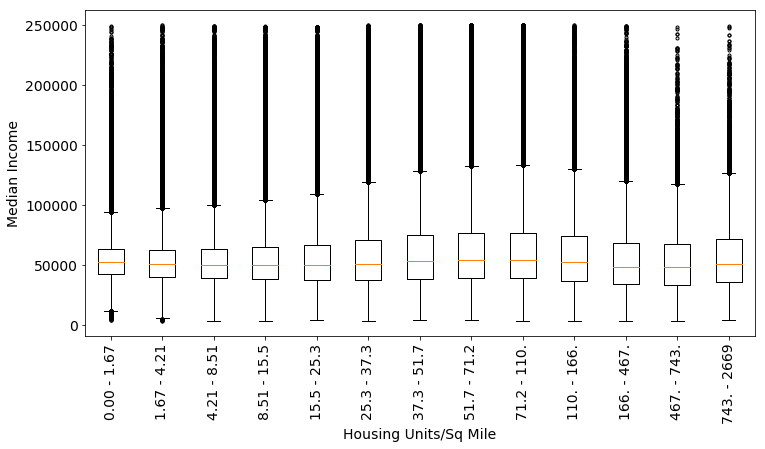

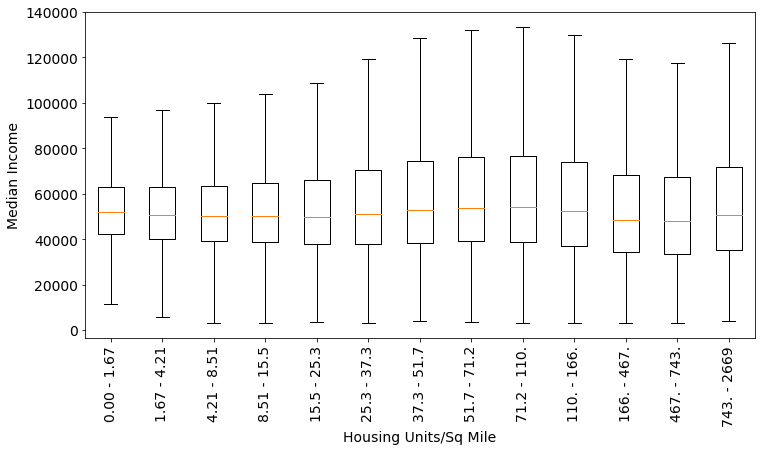

In [8]:
plt.figure(figsize = (12,6))
plt.boxplot(data, sym='.')
plt.xlabel('Housing Units/Sq Mile', fontsize=14)
plt.ylabel('Median Income', fontsize=14)
plt.xticks(range(1,14), val_range, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize = (12,6))
plt.boxplot(data, sym='')
plt.xlabel('Housing Units/Sq Mile', fontsize=14)
plt.ylabel('Median Income', fontsize=14)
plt.xticks(range(1,14), val_range, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


## Add median income for all blocks

In [218]:
similar_rural_comp

,housing_units_per_mile_range,median_all,median_fund,median_no_fund,block_count
0,0.00 - 1.67,52143.0,51576.0,52159.0,657867
1,1.67 - 4.21,50577.0,49935.5,50625.0,657867
2,4.21 - 8.51,50357.0,48542.0,50450.0,657867
3,8.51 - 15.5,50238.0,48403.0,50278.0,657867
4,15.5 - 25.3,49990.5,48500.0,50000.0,657867
5,25.3 - 37.3,51000.0,48203.0,51000.0,657867
6,37.3 - 51.7,52885.0,47115.0,52903.0,657867
7,51.7 - 71.2,53988.0,45697.0,54000.0,657867
8,71.2 - 110.,54391.0,48929.0,54403.0,657867
9,110. - 166.,52303.0,49609.5,52305.0,328933


100%|██████████| 13/13 [00:07<00:00,  1.79it/s]


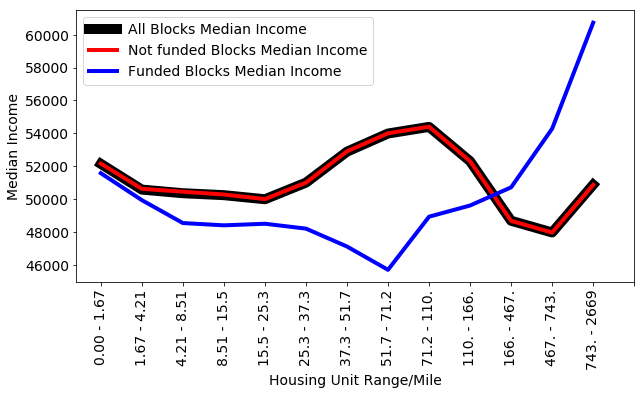

In [134]:
val_range = []
median_fund = []
median_all = []
median_no_fund = []
block_count = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block[(df_block.housing_unit_per_mile >= bins[i]) &
                    (df_block.housing_unit_per_mile < bins[i+1])]
    block_count.append(len(temp))
    
    median_all.append(np.median(temp.median_household_income_2016.dropna()))
    
    get_fund =  temp[temp.fund_count > 0]
    no_fund = temp[temp.fund_count == 0]
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
    median_no_fund.append(np.median(no_fund.median_household_income_2016.dropna()))

similar_rural_comp = pd.DataFrame()
similar_rural_comp['housing_units_per_mile_range'] = val_range
similar_rural_comp['median_all'] = median_all
similar_rural_comp['median_fund'] = median_fund
similar_rural_comp['median_no_fund'] = median_no_fund
similar_rural_comp['block_count'] = block_count

plt.figure(figsize=(10,5))
plt.plot(list(range(len(similar_rural_comp))), similar_rural_comp.median_all, linewidth=10, c='black', label = 'All Blocks Median Income')
plt.plot(list(range(len(similar_rural_comp))), similar_rural_comp.median_no_fund,linewidth=4,c='red', label = 'Not funded Blocks Median Income')
plt.plot(list(range(len(similar_rural_comp))), similar_rural_comp.median_fund,linewidth=4,c='blue', label = 'Funded Blocks Median Income')
plt.legend(fontsize=14)
plt.xticks(range(len(bins)), similar_rural_comp.housing_units_per_mile_range,fontsize=14)
plt.xlabel('Housing Unit Range/Mile',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Median Income',fontsize=14)
plt.show()

## scatterplot of results (instead of binning and using median)

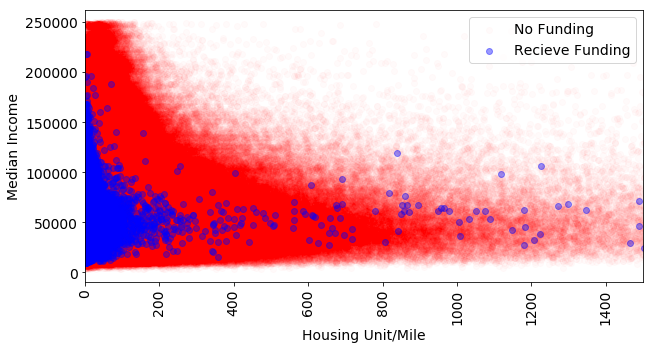

In [219]:
x = list(df_block.housing_unit_per_mile.values)
y = list(df_block.median_household_income_2016.values)
c = []
for i in df_block.fund_count:
    if i > 0:
        c.append('b')
    elif i == 0:
        c.append('r')

plt.figure(figsize=(10,5))

plt.scatter(np.array(x)[np.array(c) == 'r'], np.array(y)[np.array(c) == 'r'],c='r', alpha=0.02, label='No Funding')
plt.scatter(np.array(x)[np.array(c) == 'b'], np.array(y)[np.array(c) == 'b'],c='b', alpha=0.4, label='Recieve Funding')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Housing Unit/Mile',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Median Income',fontsize=14)
plt.xlim(0,1500)
plt.show()

## investigate behavior at high density areas (why do funded areas have higher income)
looks like these funding areas at high income are just an artifact of unique block codes (maybe low land areas high water area). Normal numbers of people live here, but there are VERY few road miles


In [230]:
# consider over 500 households/road mile
df_block_high_density = df_block[df_block.housing_unit_per_mile > 100]

In [231]:
print('Blocks with over 500 housing units/road mile',len(df_block_high_density))
print('----> Recieved Funding:',len(df_block_high_density[df_block_high_density.fund_count > 0]))
print('----> No Funding:',len(df_block_high_density[df_block_high_density.fund_count == 0]))


Blocks with over 500 housing units/road mile 776904
----> Recieved Funding: 544
----> No Funding: 776360


In [227]:
print('Median Road Length with funding:', np.median(df_block_high_density[df_block_high_density.fund_count >0].total_length/1600))
print('Median Road Length with no funding:', np.median(df_block_high_density[df_block_high_density.fund_count == 0].total_length/1600))


Median Road Length with funding: 0.01764556875
Median Road Length with no funding: 0.20812793749999997


In [229]:
print('Median Households with funding:', np.median(df_block_high_density[df_block_high_density.fund_count >0].household_2016))
print('Median Householdswith no funding:', np.median(df_block_high_density[df_block_high_density.fund_count == 0].household_2016))


Median Households with funding: 3.0
Median Householdswith no funding: 30.0


In [235]:
len(df_block_high_density[(df_block_high_density.fund_count >0) & (df_block_high_density.urban_rural == 'R')])/len(df_block_high_density[df_block_high_density.fund_count > 0])

0.8897058823529411

In [240]:
len(df_block_high_density[(df_block_high_density.fund_count == 0) & (df_block_high_density.urban_rural == 'R')])/len(df_block_high_density[df_block_high_density.fund_count == 0])

0.04272631253542171

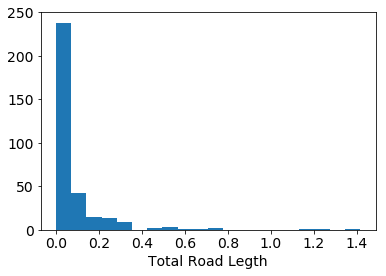

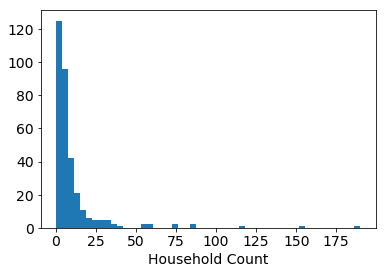

In [93]:
plt.hist(df_block_high_density[df_block_high_density.fund_count >1].total_length/1600,bins=20)
plt.xlabel('Total Road Legth', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.hist(df_block_high_density[df_block_high_density.fund_count > 1].household_2016,bins=50)
plt.xlabel('Household Count', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

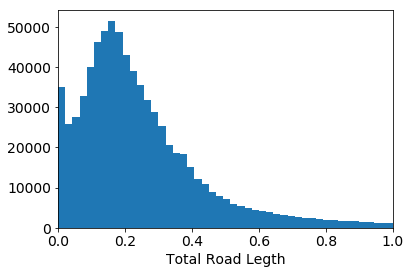

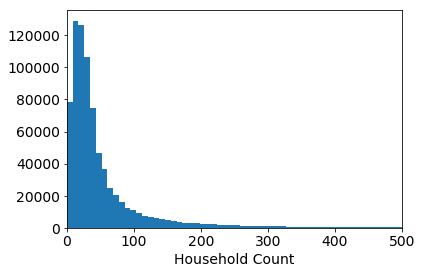

In [223]:
plt.hist(df_block_high_density[(df_block_high_density.fund_count ==0)].total_length/1600,bins=1000)
plt.xlabel('Total Road Legth', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,1)
plt.show()
plt.hist(df_block_high_density[(df_block_high_density.fund_count == 0)].household_2016,bins=300)
plt.xlabel('Household Count', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,500)

plt.show()

## investigate bias in funding on a local (instead of national) scale

###  Massachusets

In [94]:
def query_bq(query):
    return pd.read_gbq(query, project_id='fccdsicapstone-218522', dialect='standard')

In [155]:
query = """
SELECT holding_company_name, COUNT(*) as ct FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '22%'
GROUP BY holding_company_name
ORDER BY ct DESC
LIMIT 5
"""
query_bq(query)

,holding_company_name,ct
0,AT&T Inc.,31701
1,"CenturyLink, Inc.",4707
2,None,128


looks like AT&T & CenturyLink are the major providers there

In [157]:
# this query pulls fund data on these 2 companies in MA
query = """
SELECT 
  census_block, 
  SUM(CASE WHEN holding_company_name = 'AT&T Inc.' THEN 1 ELSE 0 END) AS att_ct,
  SUM(CASE WHEN holding_company_name = 'CenturyLink, Inc.' THEN 1 ELSE 0 END) AS centurylink_ct
FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '22%'
GROUP BY census_block
"""
hoco_data_state = query_bq(query)

In [158]:
df_block_state = hoco_data_state.merge(df_block, how='inner', left_on = 'census_block',right_on='block_code')

In [159]:
hoco_col =  ['att_ct','centurylink_ct']
hoco_name = ['AT&T',  'CenturyLink']

In [160]:
df_block_state_all = df_block[df_block.block_code.str.startswith('23')]

val_range = []
median_fund = []
median_no_fund = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block_state_all[(df_block_state_all.housing_unit_per_mile >= bins[i]) &
                              (df_block_state_all.housing_unit_per_mile < bins[i+1])]
    
    median_all.append(np.median(temp.median_household_income_2016.dropna()))
    
    get_fund =  temp[temp.fund_count > 0]
    no_fund = temp[temp.fund_count == 0]
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
    median_no_fund.append(np.median(no_fund.median_household_income_2016.dropna()))

similar_rural_comp_state = pd.DataFrame()
similar_rural_comp_state['housing_units_per_mile_range'] = val_range
similar_rural_comp_state['median_fund'] = median_fund
similar_rural_comp_state['median_no_fund'] = median_no_fund



 69%|██████▉   | 9/13 [00:00<00:00, 87.33it/s]/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 13/13 [00:00<00:00, 98.35it/s]


KeyError: 'att_ct'

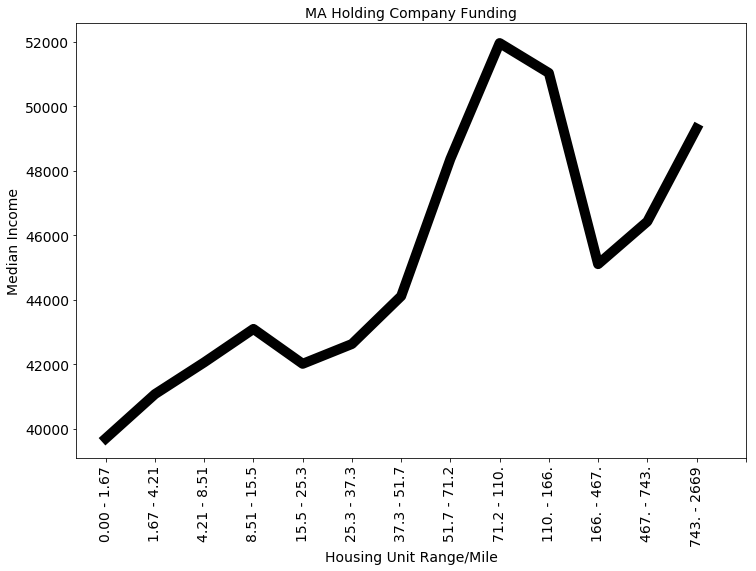

In [315]:
plt.figure(figsize=(12,8))
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_fund, linewidth=10, c='blue', label = 'Funded Blocks Median Income')
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_no_fund, linewidth=10, c='black', label = 'All Blocks Median Income')

plt.xticks(range(len(bins)), similar_rural_comp.housing_units_per_mile_range,fontsize=14)

plt.xlabel('Housing Unit Range/Mile',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.ylabel('Median Income',fontsize=14)
plt.yticks(fontsize=14)
plt.title('MA Holding Company Funding',fontsize=14)

for j in range(len(hoco_col)):
    hoco_blocks = df_block_state_all[df_block_state_all[hoco_col[j]] > 0]
    
    median_fund = []

    for i in tqdm(range(len(bins)-1)):
        temp = hoco_blocks[(hoco_blocks.housing_unit_per_mile >= bins[i]) &
                           (hoco_blocks.housing_unit_per_mile < bins[i+1])]
        get_fund =  temp[temp.fund_count > 0]
        median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
        

    
    plt.plot(list(range(len(similar_rural_comp))), median_fund, label = hoco_name[j] +' funded blocks')
    
plt.legend(fontsize=14)
plt.xlim(0,9)


### Kentucky

In [162]:
query = """
SELECT holding_company_name, COUNT(*) as ct FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '21%'
GROUP BY holding_company_name
ORDER BY ct DESC
LIMIT 5
"""
query_bq(query)

,holding_company_name,ct
0,AT&T Inc.,36392
1,"Windstream Holdings, Inc.",9830
2,None,5306
3,Ballard Rural Telephone Cooperative Corporatio...,3499
4,Cincinnati Bell Inc.,1758


looks like AT&T & CenturyLink are the major providers there

In [241]:
# this query pulls fund data on these 2 companies in MA
query = """
SELECT 
  census_block, 
  SUM(CASE WHEN holding_company_name = 'AT&T Inc.' THEN 1 ELSE 0 END) AS att_ct,
  SUM(CASE WHEN holding_company_name = 'Windstream Holdings, Inc.' THEN 1 ELSE 0 END) AS windstream_ct
FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '21%'
GROUP BY census_block
"""
hoco_data_state = query_bq(query)

In [242]:
df_block_state = hoco_data_state.merge(df_block, how='inner', left_on = 'census_block',right_on='block_code')

In [243]:
hoco_col =  ['att_ct','windstream_ct']
hoco_name = ['AT&T',  'WindStream']

In [244]:
df_block_state_all = df_block[df_block.block_code.str.startswith('21')]

val_range = []
median_fund = []
median_no_fund = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block_state_all[(df_block_state_all.housing_unit_per_mile >= bins[i]) &
                              (df_block_state_all.housing_unit_per_mile < bins[i+1])]
    
    median_all.append(np.median(temp.median_household_income_2016.dropna()))
    
    get_fund =  temp[temp.fund_count > 0]
    no_fund = temp[temp.fund_count == 0]
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
    median_no_fund.append(np.median(no_fund.median_household_income_2016.dropna()))

similar_rural_comp_state = pd.DataFrame()
similar_rural_comp_state['housing_units_per_mile_range'] = val_range
similar_rural_comp_state['median_fund'] = median_fund
similar_rural_comp_state['median_no_fund'] = median_no_fund



100%|██████████| 13/13 [00:00<00:00, 66.29it/s]


  0%|          | 0/13 [00:00<?, ?it/s]/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 13/13 [00:00<00:00, 325.92it/s]


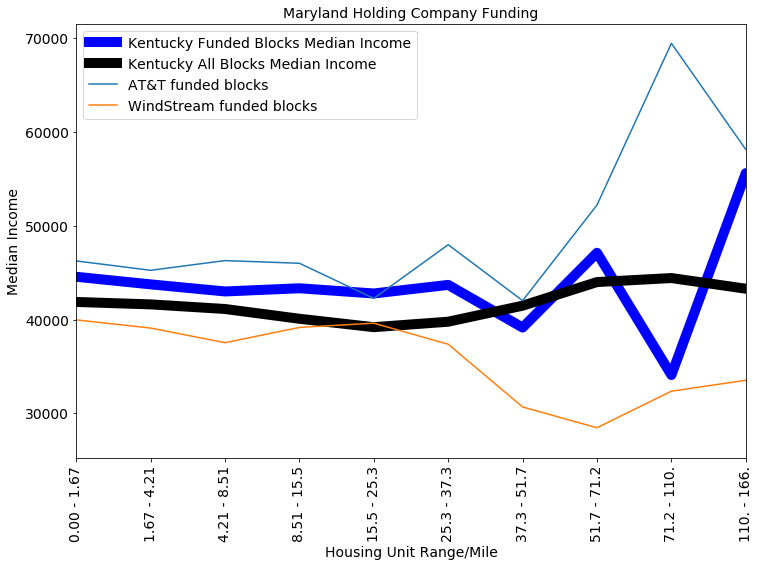

In [252]:
plt.figure(figsize=(12,8))
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_fund, linewidth=10, c='blue', label = 'Kentucky Funded Blocks Median Income')
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_no_fund, linewidth=10, c='black', label = 'Kentucky All Blocks Median Income')

plt.xticks(range(len(bins)), similar_rural_comp.housing_units_per_mile_range,fontsize=14)

plt.xlabel('Housing Unit Range/Mile',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.ylabel('Median Income',fontsize=14)
plt.yticks(fontsize=14)
plt.title('Maryland Holding Company Funding',fontsize=14)

for j in range(len(hoco_col)):
    hoco_blocks = df_block_state[df_block_state[hoco_col[j]] > 0]
    median_fund = []

    for i in tqdm(range(len(bins)-1)):
        temp = hoco_blocks[(hoco_blocks.housing_unit_per_mile >= bins[i]) &
                           (hoco_blocks.housing_unit_per_mile < bins[i+1])]
        get_fund =  temp[temp.fund_count > 0]
        median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
        

    
    plt.plot(list(range(len(similar_rural_comp))), median_fund, label = hoco_name[j] +' funded blocks')
    
plt.legend(fontsize=14)
plt.xlim(0,9)
plt.show()


### Iowa

In [251]:
query = """
SELECT holding_company_name, COUNT(*) as ct FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '19%'
GROUP BY holding_company_name
ORDER BY ct DESC
LIMIT 5
"""
query_bq(query)

,holding_company_name,ct
0,"CenturyLink, Inc.",6262
1,"Windstream Holdings, Inc.",5242
2,Mutual Telephone Company (IA),1710
3,Frontier Communications Corporation,1167
4,Hubbard Cooperative Telephone Association,520


In [260]:
# this query pulls fund data on these 2 companies in MA
query = """
SELECT 
  census_block, 
  SUM(CASE WHEN holding_company_name = 'Windstream Holdings, Inc.' THEN 1 ELSE 0 END) AS windstream_ct,
  SUM(CASE WHEN holding_company_name = 'CenturyLink, Inc.' THEN 1 ELSE 0 END) AS centurylink_ct
FROM broadband.fund
WHERE year = 2017
AND census_block LIKE '19%'
GROUP BY census_block
"""
hoco_data_state = query_bq(query)

In [261]:
df_block_state = hoco_data_state.merge(df_block, how='inner', left_on = 'census_block',right_on='block_code')

In [262]:
hoco_col =  ['windstream_ct','centurylink_ct']
hoco_name = ['Windstream',  'CenturyLink']

In [263]:
df_block_state_all = df_block[df_block.block_code.str.startswith('19')]

val_range = []
median_fund = []
median_no_fund = []

for i in tqdm(range(len(bins)-1)):
    temp = df_block_state_all[(df_block_state_all.housing_unit_per_mile >= bins[i]) &
                              (df_block_state_all.housing_unit_per_mile < bins[i+1])]
    
    median_all.append(np.median(temp.median_household_income_2016.dropna()))
    
    get_fund =  temp[temp.fund_count > 0]
    no_fund = temp[temp.fund_count == 0]
    
    val_range.append(str(bins[i])[0:4] + ' - ' + str(bins[i+1])[0:4])
    median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
    median_no_fund.append(np.median(no_fund.median_household_income_2016.dropna()))

similar_rural_comp_state = pd.DataFrame()
similar_rural_comp_state['housing_units_per_mile_range'] = val_range
similar_rural_comp_state['median_fund'] = median_fund
similar_rural_comp_state['median_no_fund'] = median_no_fund



100%|██████████| 13/13 [00:00<00:00, 65.41it/s]


  0%|          | 0/13 [00:00<?, ?it/s]/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/spare/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 13/13 [00:00<00:00, 241.42it/s]


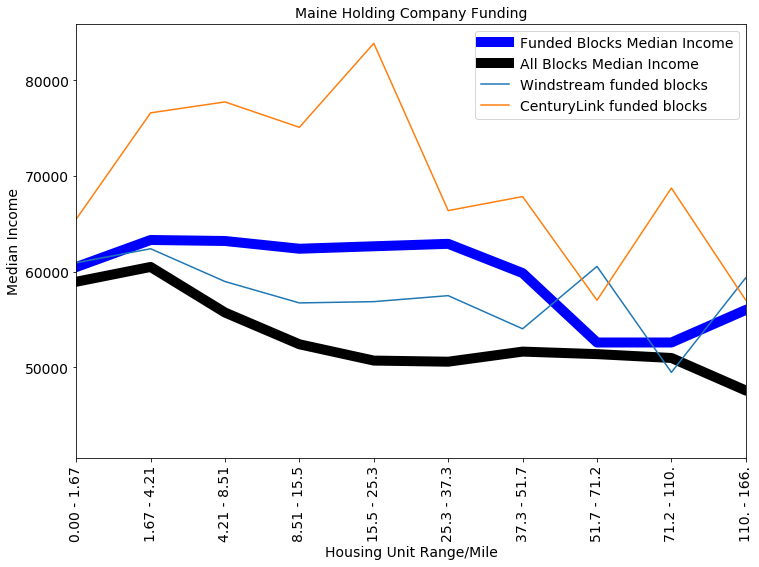

In [264]:
plt.figure(figsize=(12,8))
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_fund, linewidth=10, c='blue', label = 'Funded Blocks Median Income')
plt.plot(list(range(len(similar_rural_comp_state))), similar_rural_comp_state.median_no_fund, linewidth=10, c='black', label = 'All Blocks Median Income')

plt.xticks(range(len(bins)), similar_rural_comp.housing_units_per_mile_range,fontsize=14)

plt.xlabel('Housing Unit Range/Mile',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.ylabel('Median Income',fontsize=14)
plt.yticks(fontsize=14)
plt.title('Maine Holding Company Funding',fontsize=14)

for j in range(len(hoco_col)):
    hoco_blocks = df_block_state[df_block_state[hoco_col[j]] > 0]
    median_fund = []

    for i in tqdm(range(len(bins)-1)):
        temp = hoco_blocks[(hoco_blocks.housing_unit_per_mile >= bins[i]) &
                           (hoco_blocks.housing_unit_per_mile < bins[i+1])]
        get_fund =  temp[temp.fund_count > 0]
        median_fund.append(np.median(get_fund.median_household_income_2016.dropna()))
        

    
    plt.plot(list(range(len(similar_rural_comp))), median_fund, label = hoco_name[j] +' funded blocks')
    
plt.legend(fontsize=14)
plt.xlim(0,9)
plt.show()


# 